<a href="https://colab.research.google.com/github/Cgaz275/PTDL/blob/munny/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn Bokeh matplotlib

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Nội dung 2 - Đào Thị Thanh Tâm

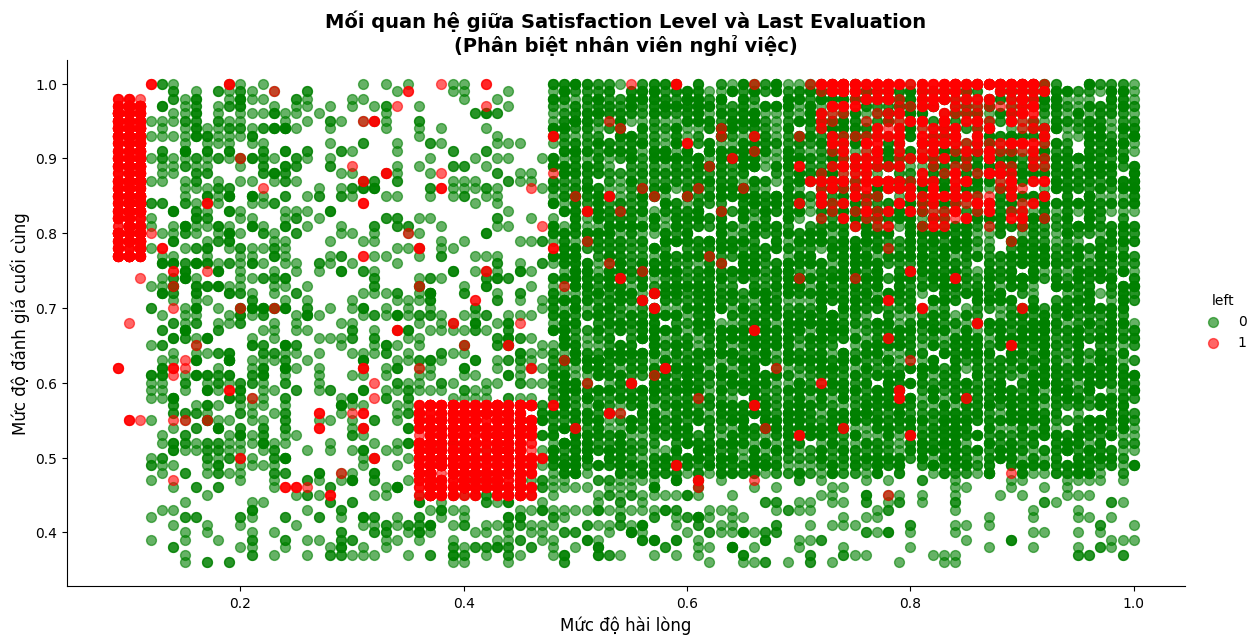

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HR_comma_sep').getOrCreate()

plot = sns.lmplot(
    x="satisfaction_level",
    y="last_evaluation",
    data=df,
    fit_reg=False,  # Không vẽ đường hồi quy
    hue="left",  # Phân biệt màu theo trạng thái nghỉ việc
    palette={0: "green", 1: "red"},  # Màu sắc: Xanh cho nhân viên còn làm, Đỏ cho nghỉ việc
    height=6,  # Chiều cao biểu đồ
    aspect=2,  # Tỷ lệ khung hình (rộng hơn)
    scatter_kws={'s': 50, 'alpha': 0.6}  # Kích thước điểm (s), độ trong suốt (alpha)
)

# Tùy chỉnh nhãn và tiêu đề
plt.xlabel("Mức độ hài lòng", fontsize=12)
plt.ylabel("Mức độ đánh giá cuối cùng", fontsize=12)
plt.title("Mối quan hệ giữa Satisfaction Level và Last Evaluation\n(Phân biệt nhân viên nghỉ việc)", fontsize=14, fontweight="bold")

# Hiển thị biểu đồ
plt.show()

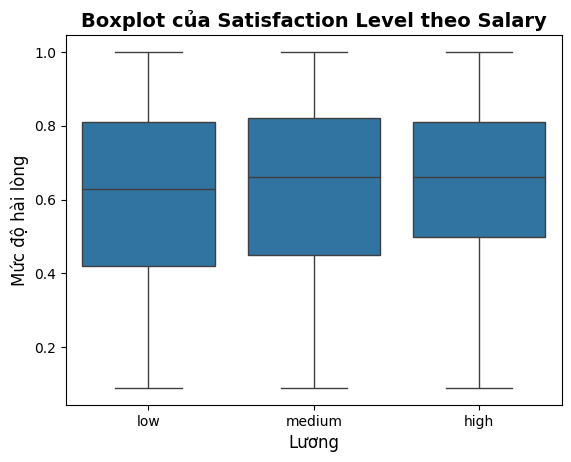

In [ ]:
# box plot
sns.boxplot(x='salary', y='satisfaction_level', data=df)
plt.title("Mức độ hài lòng theo mức lương", fontsize=14, fontweight='bold')
plt.xlabel("Lương", fontsize=12)
plt.ylabel("Mức độ hài lòng", fontsize=12)

plt.show()


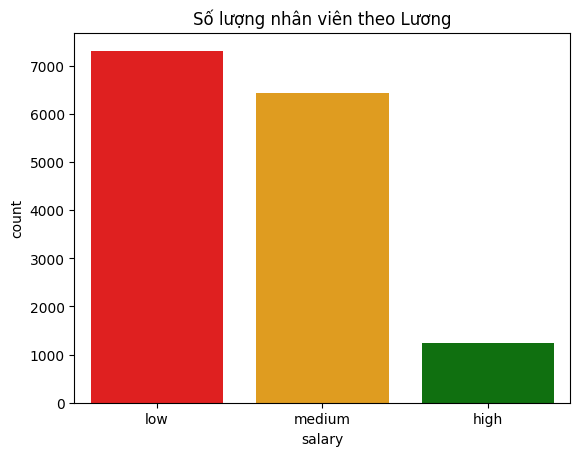

In [ ]:
# count plot
sns.countplot(x='salary', data=df, hue='salary',  palette={"low": "red", "medium": "orange", "high": "green"})
plt.title("Số lượng nhân viên theo Lương")
plt.show()